# Аттрактор Лоренца

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

def lorenz(x, y, z, sigma = 10, rho = 28, beta = 2.667):
    x_der = sigma * (y - x)
    y_der = x * (rho - z) - y
    z_der = x * y - beta * z
    return x_der, y_der, z_der

##  Задача №1. Простое решение

<br>
<font size=4> 
Система
</font>
<br>
<br>
$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>
<font size=4> 
Стандартные значения - $\sigma=10, \rho=28, \beta=2.667$
</font>
<br>

__Требования__:
- Не использовать интеграторы и массивы numpy, точки высчитывать в цикле
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Подписать рисунок и оси
- label со значениями $\sigma=10, \rho=28, \beta=2.667$


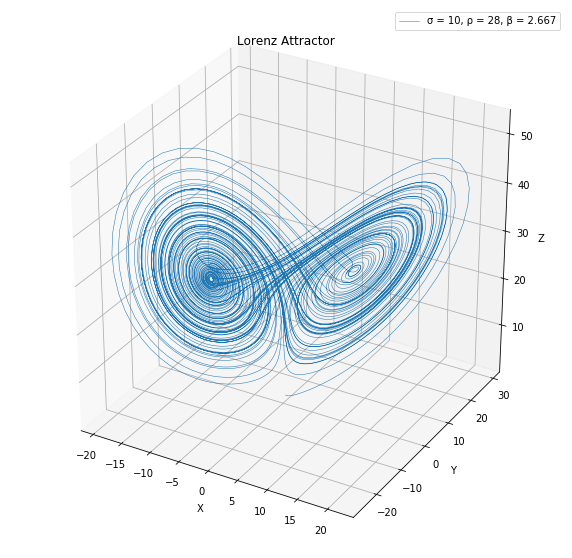

In [5]:
num_steps = 10 ** 4
dt = 0.01
xs = [0.]
ys = [1.]
zs = [1.01]

for i in range(num_steps):
    x_der, y_der, z_der = lorenz(xs[i], ys[i], zs[i])
    xs.append(xs[i] + x_der * dt)
    ys.append(ys[i] + y_der * dt)
    zs.append(zs[i] + z_der * dt)
    
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

ax.plot(xs, ys, zs, lw = 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(['\u03C3 = 10, \u03C1 = 28, \u03B2 = 2.667'])
ax.set_title("Lorenz Attractor")

plt.show();

##  Задача №2. Чуть сложнее

Аттрактор Лоренца, но другие требования:

- Использовать numpy массивы, не использовать интегрирование из scipy
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем
    - `lorenz(x, y, z)` считает производные при стандартных значениях $\sigma=10, \rho=28, \beta=2.667$
    - если нужны другие значения $\sigma, \rho, \beta$, то вызывать можно только как `lorenz(x, y, z, sigma=..., beta=..., rho=...)`
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

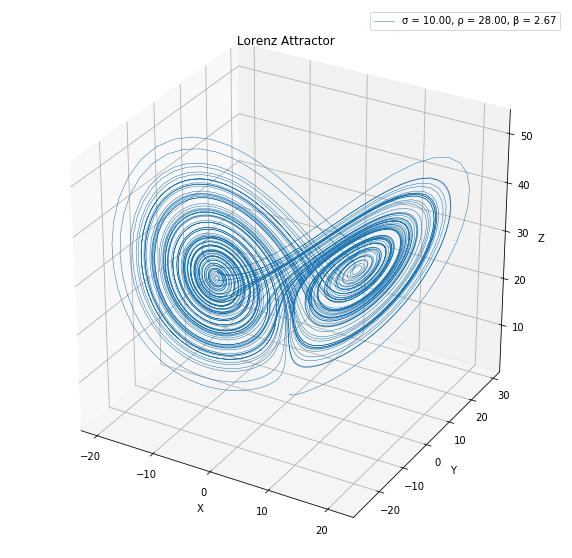

In [12]:
num_steps = 10 ** 4
dt = 0.01

sigma = 10
rho = 28
beta = 2.667

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], sigma = sigma, rho = rho, beta = beta)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
    
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

ax.plot(xs, ys, zs, lw = 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(['\u03C3 = %4.2f, \u03C1 = %4.2f, \u03B2 = %4.2f' %(sigma, rho, beta)])
ax.set_title("Lorenz Attractor")

plt.show();

##  Задача №3. Сложнее, но короче

Аттрактор Лоренца, но требования опять поменялись:

- Использовать numpy массивы и интегрирование из scipy (odeint)
- Начальные данные - $(0., 1., 1.01)$
- Временной интервал - $0...100$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем первый аргумент - кортеж из трех точек; остальное - как в _задаче №2_ (может что-то ещё понадобится, посмотрите сигнатуру `odeint`)
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

In [14]:
def lorenz_odient(X, t, sigma, beta, rho):
    x, y, z = X
    x_der = sigma * (y - x)
    y_der = x * (rho - z) - y
    z_der = x * y - beta * z
    return x_der, y_der, z_der

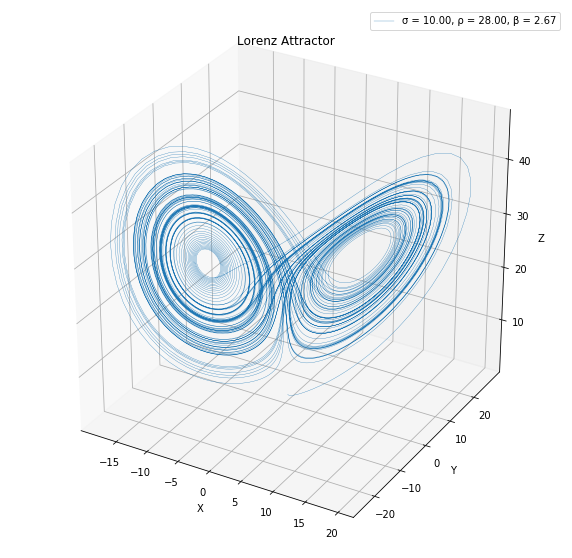

In [35]:
tmax, num_steps = 100, 10 ** 4

sigma, rho, beta = 10, 28, 2.667
x0, y0, z0 = 0., 1., 1.01

t = np.linspace(0, tmax, num_steps)
f = odeint(lorenz_odient, (x0, y0, z0), t, args = (sigma, beta, rho))
xs, ys, zs = f.T

fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw = 0.3)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(['\u03C3 = %4.2f, \u03C1 = %4.2f, \u03B2 = %4.2f' %(sigma, rho, beta)])
ax.set_title("Lorenz Attractor")

plt.show();

In [109]:
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image
import progressbar
from time import sleep

title_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=20, weight='normal', stretch='normal')
initial_state = [0., 1., 1.01]
sigma = 10
rho = 28
beta = 2.667
start_time = 0
end_time = 100
interval = 100

def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1, 1, 1, 1))
    ax.yaxis.set_pane_color((1, 1, 1, 1))
    ax.zaxis.set_pane_color((1, 1, 1, 1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30, 30))
    ax.set_ylim((-30, 30))
    ax.set_zlim((0, 50))
    ax.set_title('Lorenz system attractor', fontproperties=title_font)

    plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()

def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

def getImageList(number, folder):
    result = []
    bar = progressbar.ProgressBar(maxval=len(paths), widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    count = 0
    bar.start()
    for i in range(number):
        if (i < 100) & (i > 9):
            path = glob.glob(('{}/0%s.png'%i).format(save_folder))
        if i < 10:
            path = glob.glob(('{}/00%s.png'%i).format(save_folder))
        if i > 99: 
            path = glob.glob(('{}/%s.png'%i).format(save_folder))
        temp = Image.open(path[0])
        im = temp.copy()
        result.append(im)
        bar.update(count+1) 
        count += 1
    bar.finish()
    return result

In [113]:
print("Please input directory of repository")
save_folder = str(input()) + '/HW-05_output'

time_points = np.linspace(start_time, end_time, end_time * interval)

chunks = get_chunks(time_points, size=20)
points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]

bar = progressbar.ProgressBar(maxval=len(points), widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
for n, point in enumerate(points):
    plot_lorenz(point, n)
    bar.update(n+1) 
bar.finish()

first_last = 1000
standard_duration = 100

durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

paths = glob.glob('{}/*.png'.format(save_folder))
images = getImageList(500, save_folder)
gif_filepath = save_folder + '/animated-lorenz-attractor.gif'

gif = images[0]
gif.info['duration'] = durations
gif.info['loop'] = 0
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

Please input directory of repository
/Users/semaputnikov/Documents/Python/SPBU_python


[========================================================================] 100%
[========================================================================] 100%
